# Classification Task

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_processed_filled.csv')

columns2drop = ['Unnamed: 0', 'track_id', 'artist_id']

tracks.drop(columns2drop, inplace=True, axis=1)

tracks.shape

(106486, 40)

In [3]:
tracks.head() #Display the first 5 objects of the dataset

,album_comments,album_favorites,album_id,album_listens,album_tracks,album_type,artist_comments,artist_favorites,artist_location,artist_name,...,artist_date_created_year,artist_date_created_month,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_daytime,Attribution-NonCommercial-ShareAlike 3.0 International
0,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
1,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
2,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
3,0,4,6,47632,2,0,3,74,343,7419,...,2008.0,11.0,26.0,3,2008,11,25,0,0,0
4,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0


In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106486 entries, 0 to 106485
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   album_comments                                          106486 non-null  int64  
 1   album_favorites                                         106486 non-null  int64  
 2   album_id                                                106486 non-null  int64  
 3   album_listens                                           106486 non-null  int64  
 4   album_tracks                                            106486 non-null  int64  
 5   album_type                                              106486 non-null  int64  
 6   artist_comments                                         106486 non-null  int64  
 7   artist_favorites                                        106486 non-null  int64  
 8   artist_location         

### Data Partitioning

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score 

Split the dataset into 70% train and 30% test

In [6]:
class_name = 'Attribution-NonCommercial-ShareAlike 3.0 International'

attributes = [col for col in tracks.columns if col != class_name]

X = tracks[attributes].values
y = tracks[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [7]:
X_train.shape, X_test.shape

((74540, 39), (31946, 39))

In [8]:
tracks[class_name].value_counts()

0    91226
1    15260
Name: Attribution-NonCommercial-ShareAlike 3.0 International, dtype: int64

In [9]:
15260/(15260+91226)

0.14330522322183198

### k-Nearest Neighbors

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3 neighbors

In [12]:
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Analyze the classification performance

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [14]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

Train Accuracy 0.9893480010732493
Train F1-score [0.99378999 0.962586  ]
Train Precision [0.9926875  0.96907021]
Train Recall [0.99489492 0.95618798]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     63858
           1       0.97      0.96      0.96     10682

    accuracy                           0.99     74540
   macro avg       0.98      0.98      0.98     74540
weighted avg       0.99      0.99      0.99     74540



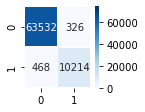

In [15]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred_tr, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
cf_matrix_train = confusion_matrix(y_train, y_pred_tr)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

Test Accuracy 0.9778062981280912
Test F1-score [0.98704763 0.92253906]
Test Precision [0.98699353 0.92284153]
Test Recall [0.98710172 0.92223678]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27368
           1       0.92      0.92      0.92      4578

    accuracy                           0.98     31946
   macro avg       0.95      0.95      0.95     31946
weighted avg       0.98      0.98      0.98     31946



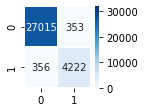

In [16]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [17]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

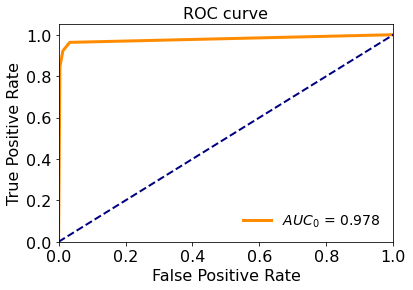

In [18]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [19]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

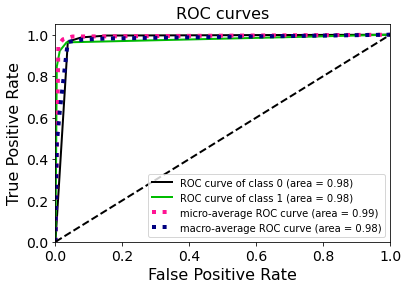

In [20]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

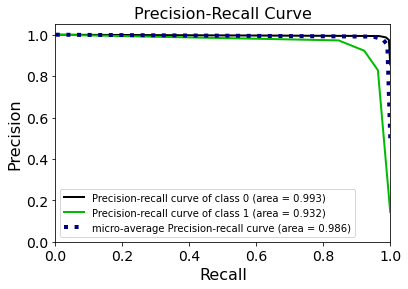

In [21]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

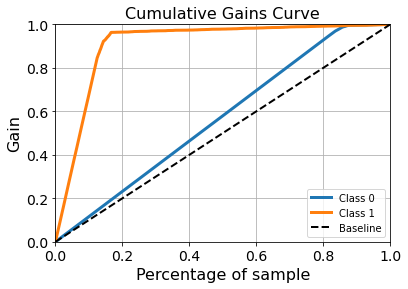

In [22]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

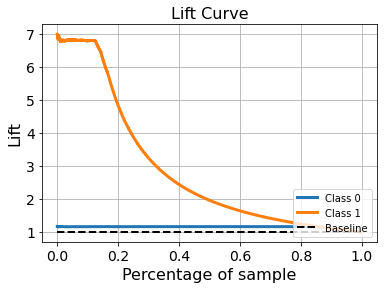

In [23]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

5 neighbors

In [24]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

Train Accuracy 0.9814998658438422
Train F1-score [0.98922816 0.93452353]
Train Precision [0.98689235 0.94816456]
Train Recall [0.99157506 0.92126943]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     63858
           1       0.95      0.92      0.93     10682

    accuracy                           0.98     74540
   macro avg       0.97      0.96      0.96     74540
weighted avg       0.98      0.98      0.98     74540



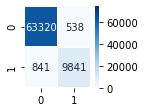

In [26]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred_tr, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
cf_matrix_train = confusion_matrix(y_train, y_pred_tr)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

Test Accuracy 0.9684154510736869
Test F1-score [0.98160337 0.88844666]
Test Precision [0.9796208  0.89948511]
Test Recall [0.98359398 0.87767584]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27368
           1       0.90      0.88      0.89      4578

    accuracy                           0.97     31946
   macro avg       0.94      0.93      0.94     31946
weighted avg       0.97      0.97      0.97     31946



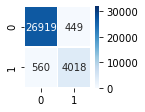

In [27]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [28]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

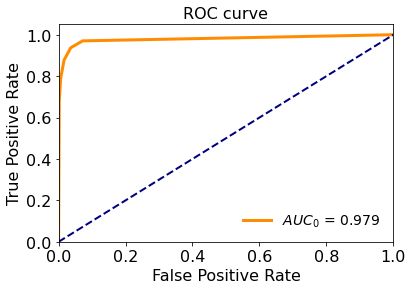

In [29]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

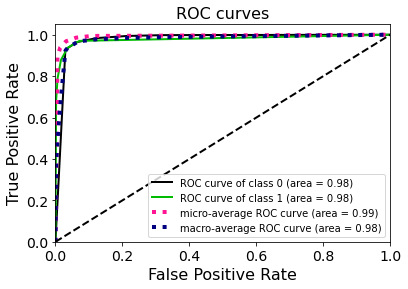

In [30]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

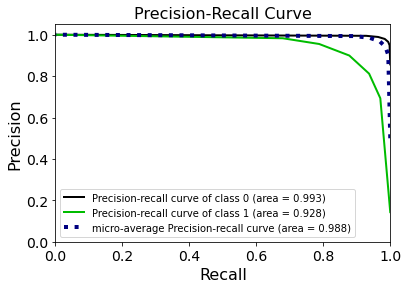

In [31]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

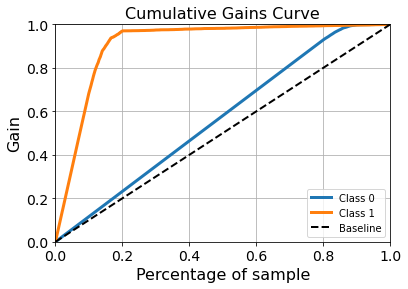

In [32]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

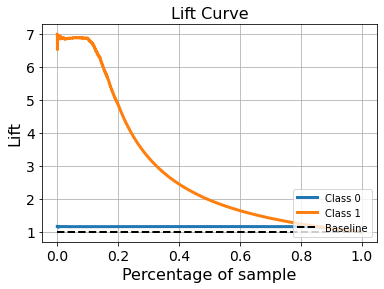

In [33]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

7 neighbors

In [34]:
clf = KNeighborsClassifier(n_neighbors=7, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [35]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

Train Accuracy 0.9726187281996244
Train F1-score [0.98409705 0.90158638]
Train Precision [0.97932788 0.92960127]
Train Recall [0.9889129  0.87521063]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     63858
           1       0.93      0.88      0.90     10682

    accuracy                           0.97     74540
   macro avg       0.95      0.93      0.94     74540
weighted avg       0.97      0.97      0.97     74540



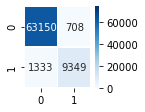

In [36]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred_tr, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
cf_matrix_train = confusion_matrix(y_train, y_pred_tr)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

Test Accuracy 0.9583359419019596
Test F1-score [0.97581978 0.84955352]
Test Precision [0.97037251 0.88029984]
Test Recall [0.98132856 0.82088248]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     27368
           1       0.88      0.82      0.85      4578

    accuracy                           0.96     31946
   macro avg       0.93      0.90      0.91     31946
weighted avg       0.96      0.96      0.96     31946



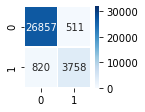

In [37]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [38]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

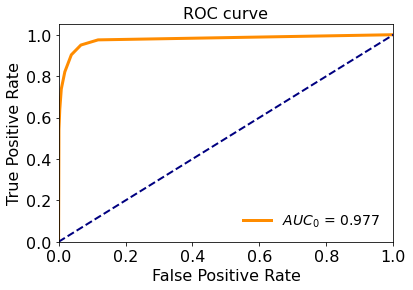

In [39]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

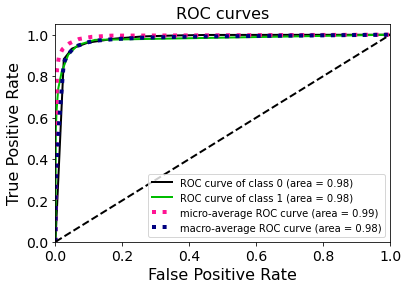

In [40]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

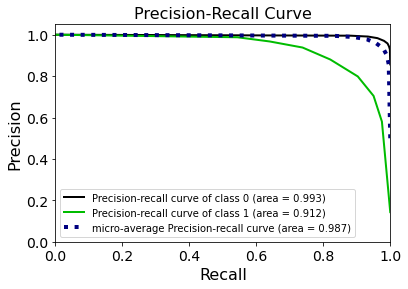

In [41]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

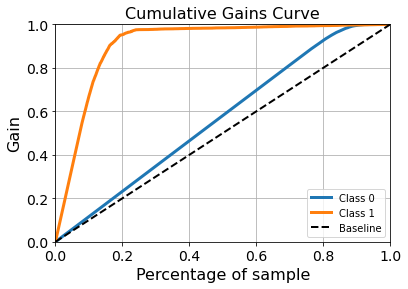

In [42]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

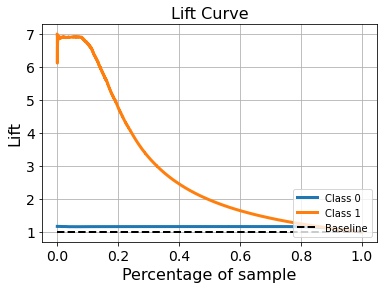

In [43]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

9 neighbors

In [44]:
clf = KNeighborsClassifier(n_neighbors=9, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [45]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

Train Accuracy 0.9638985779447277
Train F1-score [0.97909172 0.86792638]
Train Precision [0.97162552 0.91220468]
Train Recall [0.98667356 0.82774761]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     63858
           1       0.91      0.83      0.87     10682

    accuracy                           0.96     74540
   macro avg       0.94      0.91      0.92     74540
weighted avg       0.96      0.96      0.96     74540



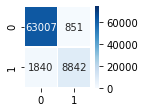

In [46]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred_tr, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
cf_matrix_train = confusion_matrix(y_train, y_pred_tr)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

Test Accuracy 0.9501032993175984
Test F1-score [0.97114723 0.81563729]
Test Precision [0.96226415 0.866765  ]
Test Recall [0.98019585 0.77020533]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     27368
           1       0.87      0.77      0.82      4578

    accuracy                           0.95     31946
   macro avg       0.91      0.88      0.89     31946
weighted avg       0.95      0.95      0.95     31946



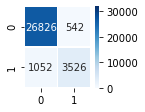

In [47]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [48]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

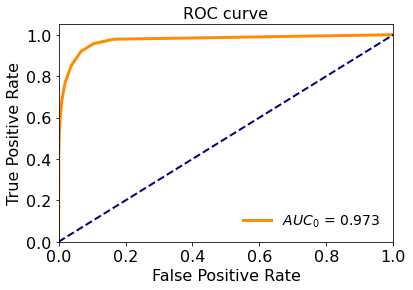

In [49]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

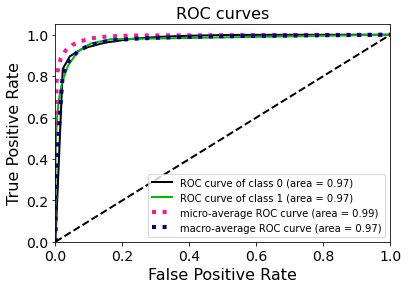

In [50]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

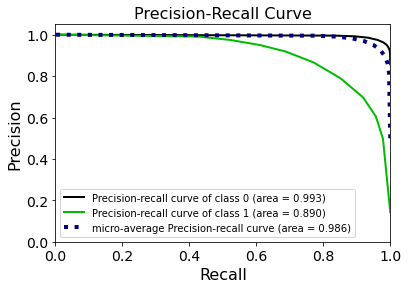

In [51]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

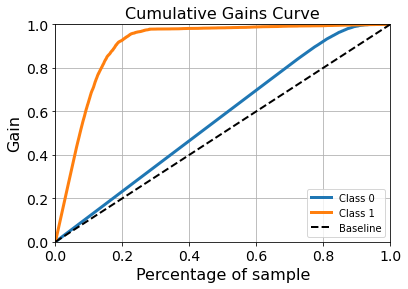

In [52]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

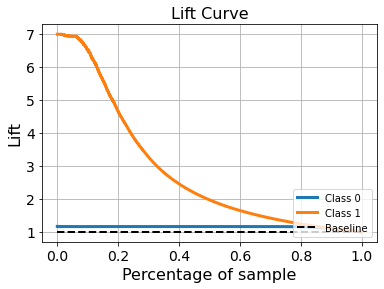

In [53]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [56]:
param_list = {'n_neighbors': np.arange(1, 50), # or random.randint(1,50,60)
              'weights': ['uniform', 'distance']
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list,
                                   n_iter=50, cv=5, random_state=0)
random_search.fit(X, y)
clf = random_search.best_estimator_
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.842 (std: 0.016)
Parameters: {'weights': 'uniform', 'n_neighbors': 46}

Model with rank: 2
Mean validation score: 0.842 (std: 0.017)
Parameters: {'weights': 'uniform', 'n_neighbors': 44}

Model with rank: 3
Mean validation score: 0.840 (std: 0.018)
Parameters: {'weights': 'uniform', 'n_neighbors': 42}



In [57]:
clf = KNeighborsClassifier(n_neighbors=46, weights='uniform')

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=46)

In [58]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

Train Accuracy 0.8971827206868795
Train F1-score [0.94272476 0.49810085]
Train Precision [0.90166114 0.82890148]
Train Recall [0.9877071  0.35601947]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     63858
           1       0.83      0.36      0.50     10682

    accuracy                           0.90     74540
   macro avg       0.87      0.67      0.72     74540
weighted avg       0.89      0.90      0.88     74540



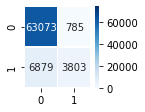

In [68]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred_tr, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
cf_matrix_train = confusion_matrix(y_train, y_pred_tr)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

Test Accuracy 0.8962624428723471
Test F1-score [0.9421701  0.49681142]
Test Precision [0.90173024 0.81474104]
Test Recall [0.98640748 0.35736129]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     27368
           1       0.81      0.36      0.50      4578

    accuracy                           0.90     31946
   macro avg       0.86      0.67      0.72     31946
weighted avg       0.89      0.90      0.88     31946



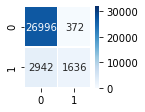

In [69]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [70]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

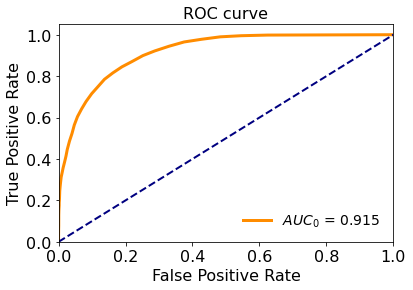

In [71]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

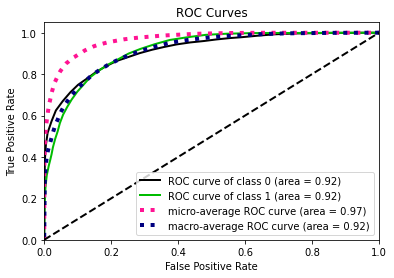

In [72]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

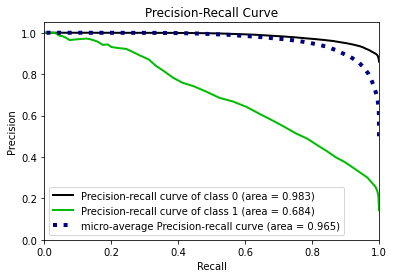

In [73]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

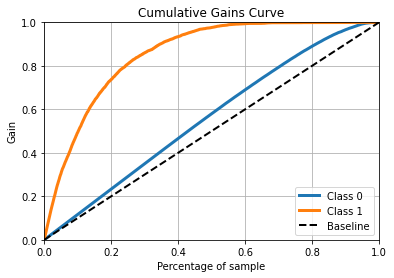

In [74]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

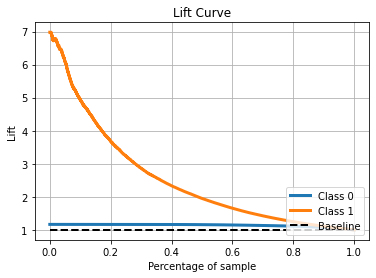

In [75]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Add an example from sklearn from lecture jupyter notebook